In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
class MultiClassLogisticRegression:
    
    def __init__(self, learning_rate = 0.01, epoch = 2000):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.w = []
        self.b = []
        
    def initialize_weight(self,dim):
        w = np.random.normal(0,1,(dim,10))
        b = np.random.rand(10)
        return w,b
    
    def sigmoid(self, x):
        s = 1/(1 + np.exp(-x))
        return s
    
    def hypothesis(self, w, X, b):
        # 60000 * 784 * 784 * 10
        y_hat = self.sigmoid(np.matmul(X,w)+b)
        y_hat = np.squeeze(y_hat)
        return y_hat
    
    def cost(self, y_hat, y, N):
        cost = -(1/N)*np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat), axis = 0)
        cost = np.squeeze(cost)
        return cost
    
    def cal_gradient(self, w, y_hat, X, y):
        N = X.shape[0] # 60000
        # 784 * 60000 * 60000 * 10 = 784 * 10
        delta_w = (1/N)*np.matmul(X.T, (y_hat-y))
        
        # 1 * 10
        delta_b = (1/N)*np.sum(y_hat-y, axis = 0)
        grads = {"delta_w": delta_w,
                "delta_b": delta_b}
        return grads
    
    def gradient_position(self, w, b, X, y):
        N = X.shape[0]
        y_hat = self.hypothesis(w, X, b)
        cost = self.cost(y_hat, y, N)
        grads = self.cal_gradient(w, y_hat, X, y)
        return grads, cost
    
    def gradient_descent(self, w, b, X, y, print_cost = False):
        
        costs = []
        
        for i in range(self.epoch):
            grads, cost = self.gradient_position(w, b, X, y)
            
            delta_w = grads["delta_w"]
            delta_b = grads["delta_b"]
            
            delta_w = delta_w.reshape(784, 10)
            delta_b = delta_b.reshape(1, 10)
            
            w = w -(self.learning_rate * delta_w)
            b = b -(self.learning_rate * delta_b)
            if i % 100 == 0:
                costs.append(cost)
            
            if print_cost and i % 100 == 0:
                print("Cost after iteration %i: %f" %(i, cost))
                
            params = {"w" : w,
                     "b" : b}
            
            grads = {"delta_w": delta_w,
                    "delta_b": delta_b}
            
        return params, costs
    
    def train_model(self, X_train, Y_train, X_test, Y_test, print_cost = False):
        dim = np.shape(X_train)[1]
        w, b = self.initialize_weight(dim)
        parameters, costs = self.gradient_descent(w, b, X_train, Y_train, print_cost = False)
        
        self.w = parameters["w"]
        self.b = parameters["b"]
        
        Y_prediction_test = self.predict(X_test)
        Y_prediction_train = self.predict(X_train)
        
        train_score = 100-np.mean((np.sum(np.abs(Y_prediction_train - Y_train), axis = 1))/2) * 100
        test_score = 100-np.mean((np.sum(np.abs(Y_prediction_test - Y_test), axis = 1))/2) * 100
        
        print("test accuracy: {} %".format(100-np.mean((np.sum(np.abs(Y_prediction_test - Y_test), axis = 1))/2) * 100))
        result_dict = {"costs": costs,
                      "Y_prediction_test": Y_prediction_test,
                      "Y_prediction_train": Y_prediction_train,
                      "w": self.w,
                      "b": self.b,
                      "learning_rate": self.learning_rate,
                      "num_iterations": self.epoch,
                      "train accuracy": train_score,
                      "test accuracy": test_score}
        return result_dict
    
    def predict(self,X):
        X = np.array(X)
        N = X.shape[0]
        
        Y_prediction = np.zeros(N)
        
        w = self.w.reshape(784, 10)
        b = self.b.reshape(1, 10)
        
        # 60000 * 10
        y_hat = self.hypothesis(w, X, b)
        
        for i in range(len(y_hat)):
            idx = np.argmax(y_hat[i])
            Y_prediction[i] = idx
            
        Y_prediction = Y_prediction.astype(np.int)
        n_values = np.max(Y_prediction) + 1
        Y_prediction = np.eye(n_values)[Y_prediction]
        
        return Y_prediction

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

train_X = np.array(X[:-10000])
test_X = np.array(X[-10000:])

## one hot encoding
train_y = y[:-10000].astype(np.int)
test_y = y[-10000:].astype(np.int)

n_values = np.max(train_y) + 1
train_y = np.eye(n_values)[train_y]
test_y = np.eye(n_values)[test_y]

/var/folders/9q/sg0csh752098vchj19dv46mw0000gn/T/ipykernel_19197/1019761048.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_y = y[:-10000].astype(np.int)
/var/folders/9q/sg0csh752098vchj19dv46mw0000gn/T/ipykernel_19197/1019761048.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

In [4]:
train_normalized_X = (train_X - np.mean(train_X, axis = 0)) / np.std(train_X, axis = 0)
train_normalized_X[np.isnan(train_normalized_X)] = train_X[np.isnan(train_normalized_X)]
test_normalized_X = (test_X - np.mean(test_X, axis = 0)) / np.std(test_X, axis = 0)
test_normalized_X[np.isnan(test_normalized_X)] = test_X[np.isnan(test_normalized_X)]

/var/folders/9q/sg0csh752098vchj19dv46mw0000gn/T/ipykernel_19197/2734277639.py:1: RuntimeWarning: invalid value encountered in true_divide
  train_normalized_X = (train_X - np.mean(train_X, axis = 0)) / np.std(train_X, axis = 0)
/var/folders/9q/sg0csh752098vchj19dv46mw0000gn/T/ipykernel_19197/2734277639.py:3: RuntimeWarning: invalid value encountered in true_divide
  test_normalized_X = (test_X - np.mean(test_X, axis = 0)) / np.std(test_X, axis = 0)


In [5]:
##Train

MCLR_cls = MultiClassLogisticRegression(epoch=20000)
result_dict = MCLR_cls.train_model(train_normalized_X, train_y, test_normalized_X, test_y)

/var/folders/9q/sg0csh752098vchj19dv46mw0000gn/T/ipykernel_19197/3494332922.py:15: RuntimeWarning: overflow encountered in exp
  s = 1/(1 + np.exp(-x))
/var/folders/9q/sg0csh752098vchj19dv46mw0000gn/T/ipykernel_19197/3494332922.py:25: RuntimeWarning: divide by zero encountered in log
  cost = -(1/N)*np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat), axis = 0)
/var/folders/9q/sg0csh752098vchj19dv46mw0000gn/T/ipykernel_19197/3494332922.py:25: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/N)*np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat), axis = 0)


test accuracy: 84.3 %


/var/folders/9q/sg0csh752098vchj19dv46mw0000gn/T/ipykernel_19197/3494332922.py:118: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_prediction = Y_prediction.astype(np.int)


Label:  0
Prediction:  0


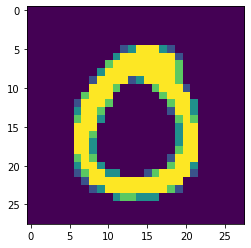

In [6]:
plt.imshow(test_X[407].reshape(28,28))
label = np.argmax(test_y[407])
prediction = np.argmax(result_dict['Y_prediction_test'][407])
print("Label: ",label)
print("Prediction: ",prediction)

Label:  2
Prediction:  2


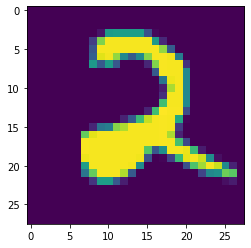

In [7]:
plt.imshow(test_X[1407].reshape(28,28))
label = np.argmax(test_y[1407])
prediction = np.argmax(result_dict['Y_prediction_test'][1407])
print("Label: ",label)
print("Prediction: ",prediction)

Label:  7
Prediction:  7


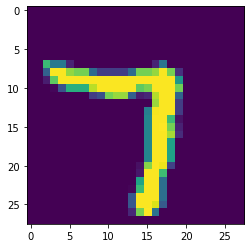

In [8]:
plt.imshow(test_X[2407].reshape(28,28))
label = np.argmax(test_y[2407])
prediction = np.argmax(result_dict['Y_prediction_test'][2407])
print("Label: ",label)
print("Prediction: ",prediction)

Label:  3
Prediction:  3


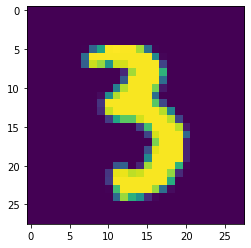

In [9]:
plt.imshow(test_X[3407].reshape(28,28))
label = np.argmax(test_y[3407])
prediction = np.argmax(result_dict['Y_prediction_test'][3407])
print("Label: ",label)
print("Prediction: ",prediction)

Label:  9
Prediction:  9


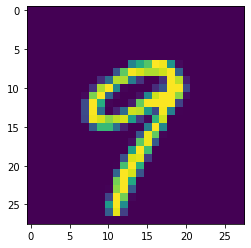

In [10]:
plt.imshow(test_X[4407].reshape(28,28))
label = np.argmax(test_y[4407])
prediction = np.argmax(result_dict['Y_prediction_test'][4407])
print("Label: ",label)
print("Prediction: ",prediction)

Label:  2
Prediction:  2


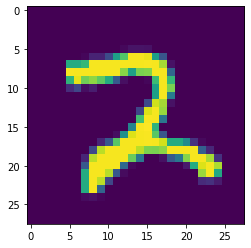

In [11]:
plt.imshow(test_X[5407].reshape(28,28))
label = np.argmax(test_y[5407])
prediction = np.argmax(result_dict['Y_prediction_test'][5407])
print("Label: ",label)
print("Prediction: ",prediction)

Label:  1
Prediction:  1


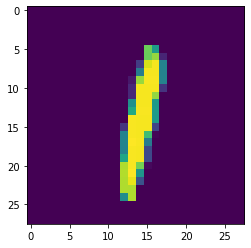

In [12]:
plt.imshow(test_X[6407].reshape(28,28))
label = np.argmax(test_y[6407])
prediction = np.argmax(result_dict['Y_prediction_test'][6407])
print("Label: ",label)
print("Prediction: ",prediction)

Label:  3
Prediction:  3


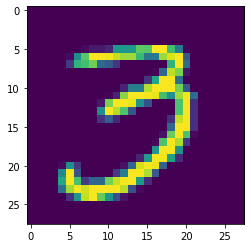

In [13]:
plt.imshow(test_X[7407].reshape(28,28))
label = np.argmax(test_y[7407])
prediction = np.argmax(result_dict['Y_prediction_test'][7407])
print("Label: ",label)
print("Prediction: ",prediction)

Label:  3
Prediction:  3


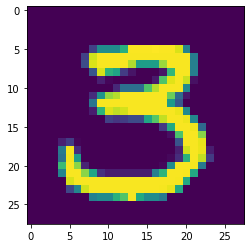

In [14]:
plt.imshow(test_X[8407].reshape(28,28))
label = np.argmax(test_y[8407])
prediction = np.argmax(result_dict['Y_prediction_test'][8407])
print("Label: ",label)
print("Prediction: ",prediction)

Label:  1
Prediction:  1


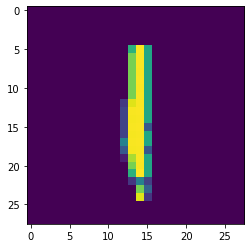

In [15]:
plt.imshow(test_X[9407].reshape(28,28))
label = np.argmax(test_y[9407])
prediction = np.argmax(result_dict['Y_prediction_test'][9407])
print("Label: ",label)
print("Prediction: ",prediction)